In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/Users/austinchang/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Read data

In [2]:
def process_data(df):
    # Fill NaN values in 'Crime_rate' with 5922
    df["Crime_rate"].fillna(5922, inplace=True)
    
    # Convert feature to be numctic
    df['median_income'] = df['median_2019_2020'].str.replace(',', '').astype(float)
    df['is_nearby_hospital'] = df['is_nearby_hospital'].astype(int)
    df['is_cbd'] = df['is_cbd'].astype(int)
    
    # Select the columns that going to be used in model
    selected_features = df[['cost_text', 'Beds', 'Baths', 'Parking', 'pyte', 'Crime_rate', 'Pop_density', 'median_income'
                          ,'school_rank_value', 'bus_value', 'tram_value', 'train_value', 'country_train'
                          , 'walk_time', 'drive_time', 'is_cbd', 'is_nearby_hospital']].copy()
    
    # Modify certain features so that higher values are considered better
    features_reverse = ['school_rank_value', 'bus_value', 'tram_value', 'train_value', 'country_train']
    selected_features[features_reverse] = selected_features[features_reverse].applymap(lambda x: 1-x if x != 0 else x)

    features_inver = ['Crime_rate', 'walk_time', 'drive_time']
    selected_features[features_inver] = 1 / selected_features[features_inver]
    
    return selected_features

In [3]:
# read data
apartment = pd.read_csv('../data/curated/Final/apartment.csv')
apartment = process_data(apartment)

house = pd.read_csv('../data/curated/Final/house.csv')
house = process_data(house)

town_house = pd.read_csv('../data/curated/Final/town_house.csv')
town_house = process_data(town_house)

In [4]:
property = pd.concat([apartment, house, town_house], ignore_index=True)

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Encode the "suburb" column
property['ptype_encoded'] = label_encoder.fit_transform(property['pyte'])


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Data preprocessing: Select relevant features and handle missing values
# For simplicity, let's assume you have already preprocessed the data

# Split the data into features (X) and the target variable (y)
X = property[['Crime_rate','Beds','Baths', 'Parking','ptype_encoded', 'Pop_density','median_income',
              'school_rank_value', 'bus_value', 'tram_value', 'country_train',
              'walk_time']]
y = property['cost_text']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Squared Error: 28577.33382894108
Root Mean Squared Error: 169.0483180305
R-squared: 0.5085442524478847


Crime_rate: 0.018852047815961243
Beds: 0.05244714993534434
Baths: 0.05752233381745049
Parking: 0.010556066649500786
ptype_encoded: 0.004894945381345209
Pop_density: 0.02278477574430336
median_income: 0.02402144669979889
school_rank_value: 0.6734885716126009
bus_value: 0.01653799812308677
tram_value: 0.06774679375048645
country_train: 0.03261657164739323
walk_time: 0.018531298822728314


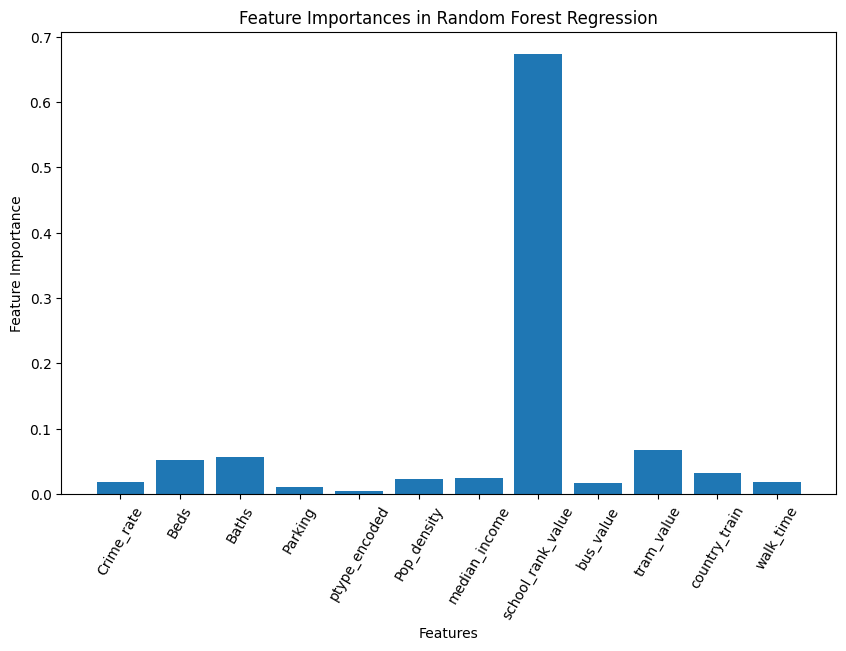

In [6]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.xticks(rotation=60)
plt.ylabel('Feature Importance')
plt.title('Feature Importances in Random Forest Regression')
plt.show()

Mean Squared Error: 25878.209816032
R-squared: 0.5549621589412019


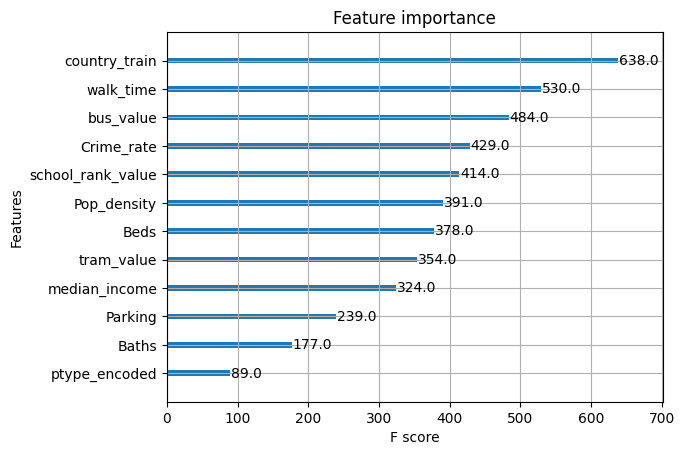

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(xgb_model)
plt.show()


## Apartment

### Random Forest Regression

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Data preprocessing: Select relevant features and handle missing values
# For simplicity, let's assume you have already preprocessed the data

# Split the data into features (X) and the target variable (y)
X = apartment[['Crime_rate','Beds','Baths','Parking','Pop_density','median_income','school_rank_value',
               'bus_value','tram_value','walk_time','is_nearby_hospital']]
y = apartment['cost_text']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Squared Error: 23983.641693681773
Root Mean Squared Error: 154.86652864218846
R-squared: 0.5502753146517294


### Feature Importance

Crime_rate: 0.045858138336888704
Beds: 0.10101834729715777
Baths: 0.24050665929251527
Parking: 0.04053911814951626
Pop_density: 0.15336828136290923
median_income: 0.06582211909584786
school_rank_value: 0.0787013075815427
bus_value: 0.078627086458808
tram_value: 0.09900377769400888
walk_time: 0.09172998991975151
is_nearby_hospital: 0.004825174811053857


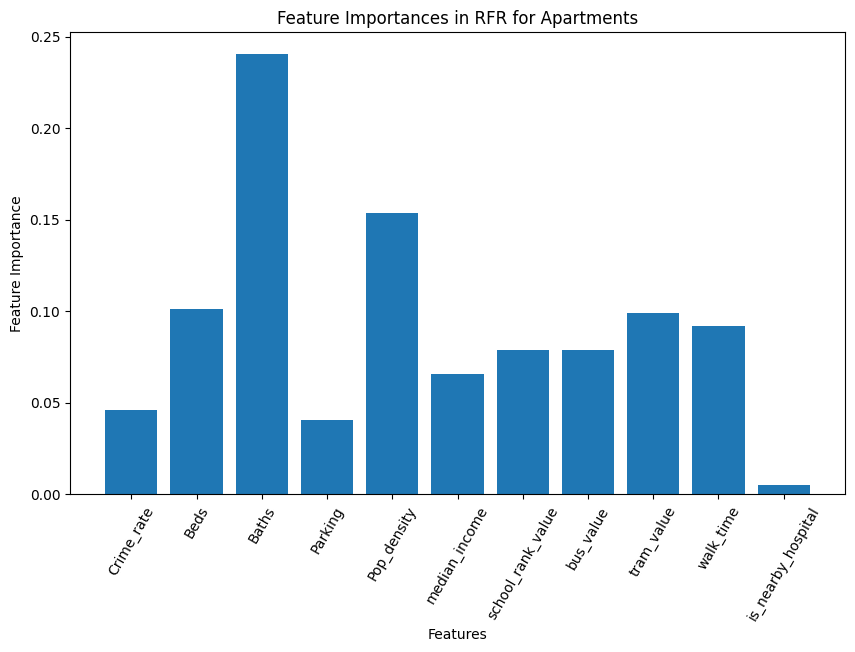

In [9]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.xticks(rotation=60)
plt.ylabel('Feature Importance')
plt.title('Feature Importances in RFR for Apartments')
plt.show()

### XGBoost Regression

Mean Squared Error: 25329.22286020045
R-squared: 0.525043905908553


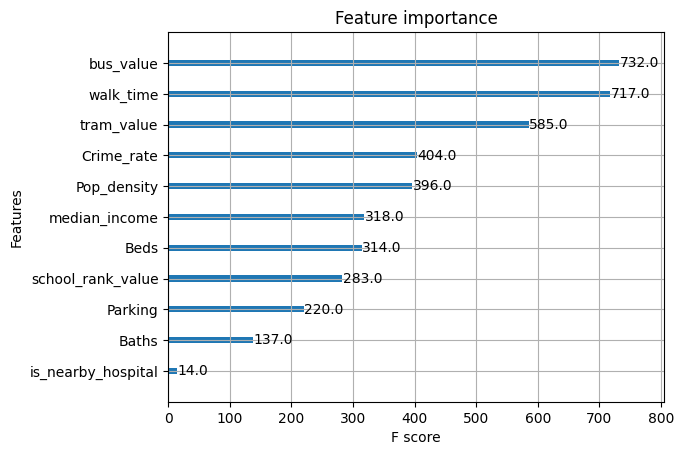

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(xgb_model)
plt.show()


## Town House

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Data preprocessing: Select relevant features and handle missing values
# For simplicity, let's assume you have already preprocessed the data

# Split the data into features (X) and the target variable (y)
X = town_house[['Crime_rate','Beds','Baths','Pop_density','median_income','school_rank_value',
               'bus_value','tram_value','train_value','country_train','is_nearby_hospital']]
y = town_house['cost_text']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Squared Error: 10467.607569182926
Root Mean Squared Error: 102.31132669056211
R-squared: 0.6612030617019862


Crime_rate: 0.07244120302046612
Beds: 0.15892998048508206
Baths: 0.06742828211806015
Pop_density: 0.14662128423985446
median_income: 0.11856615973403532
school_rank_value: 0.13867409941147707
bus_value: 0.03392359705426483
tram_value: 0.12186145813378277
train_value: 0.043564311367856864
country_train: 0.09506876291249618
is_nearby_hospital: 0.002920861522624289


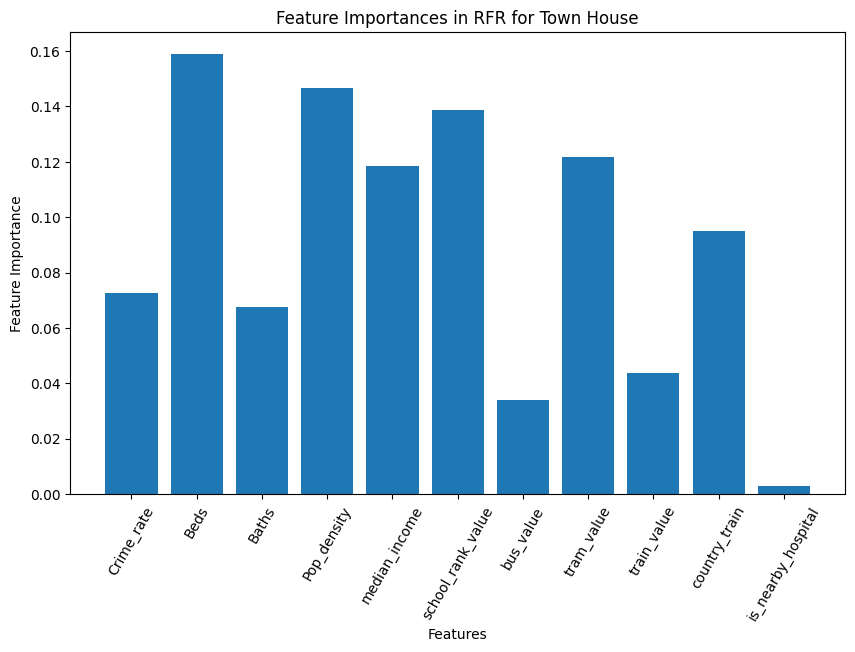

In [12]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.xticks(rotation=60)
plt.ylabel('Feature Importance')
plt.title('Feature Importances in RFR for Town House')
plt.show()

Mean Squared Error: 12431.323903805125
R-squared: 0.5976449776356257


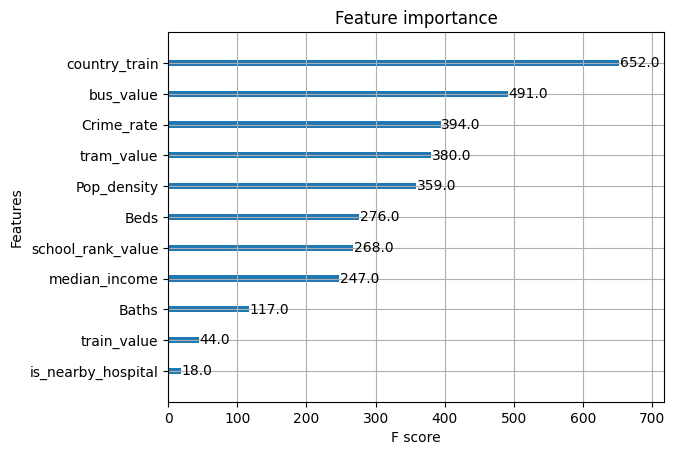

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(xgb_model)
plt.show()


In [14]:
max_cost_index = house['cost_text'].idxmax()

# Delete the row with the maximum 'cost_text'
house = house.drop(max_cost_index)


### House

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Data preprocessing: Select relevant features and handle missing values
# For simplicity, let's assume you have already preprocessed the data

# Split the data into features (X) and the target variable (y)


X = house[['Crime_rate','Beds','Baths', 'Parking', 'Pop_density','median_income',
              'school_rank_value', 'bus_value', 'tram_value', 'country_train',
              'walk_time']]
y = house['cost_text']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Squared Error: 21178.198662030707
Root Mean Squared Error: 145.52731242633016
R-squared: 0.46464977013383324


Crime_rate: 0.04403137959840888
Beds: 0.09201610820396414
Baths: 0.19573417237169816
Parking: 0.03005944766690163
Pop_density: 0.09888764723951517
median_income: 0.21637196847276557
school_rank_value: 0.0625003505764215
bus_value: 0.0453552597266437
tram_value: 0.07257258323678835
country_train: 0.09520340978336779
walk_time: 0.04726767312352526


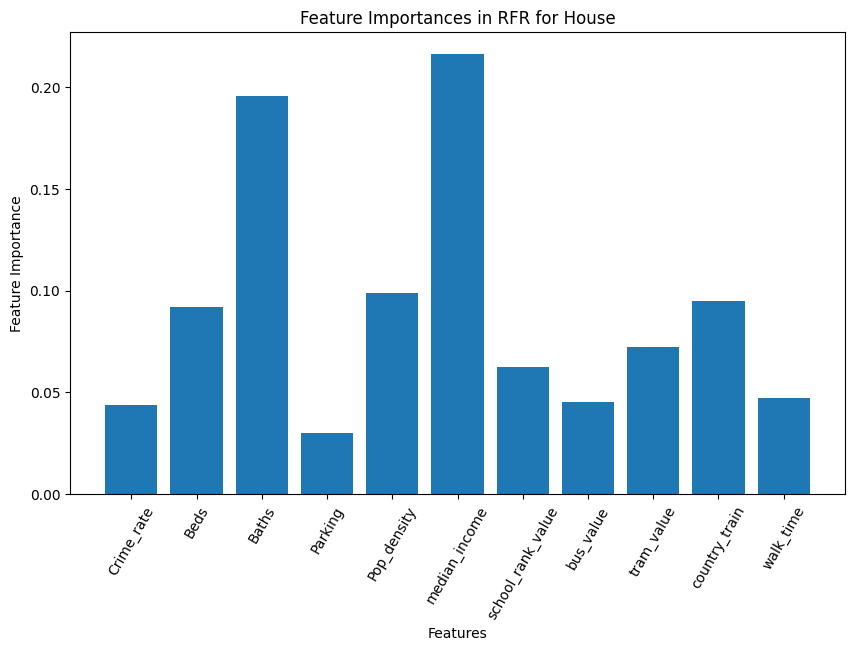

In [16]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.xticks(rotation=60)
plt.ylabel('Feature Importance')
plt.title('Feature Importances in RFR for House')
plt.show()

Mean Squared Error: 18996.697898417566
R-squared: 0.5197945420708028


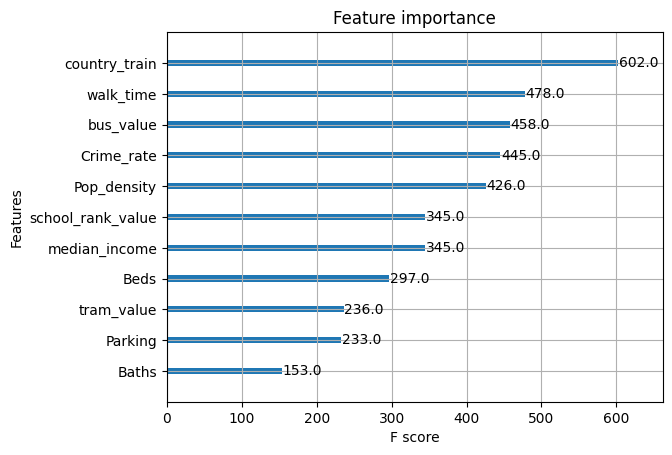

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(xgb_model)
plt.show()

## Plotting

In [18]:
def box_plot(df):
    fig, axs = plt.subplots(1, 3, figsize = (15 ,5))
    axs[0].boxplot(apartment['cost_text'])
    axs[0].set_xlabel('Apartment')
    axs[1].boxplot(house['cost_text'])
    axs[1].set_xlabel('House')
    axs[2].boxplot(town_house['cost_text'])
    axs[2].set_xlabel('Town House')
    fig.suptitle('Boxplot of Rental Price of Three Properties', fontsize=18)
    plt.show()

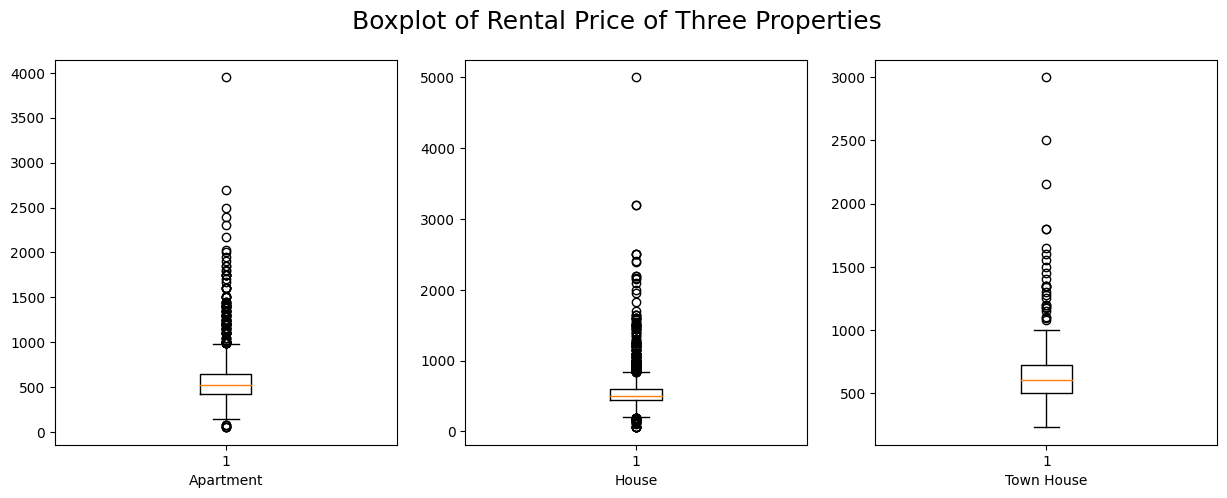

In [19]:
box_plot(property)

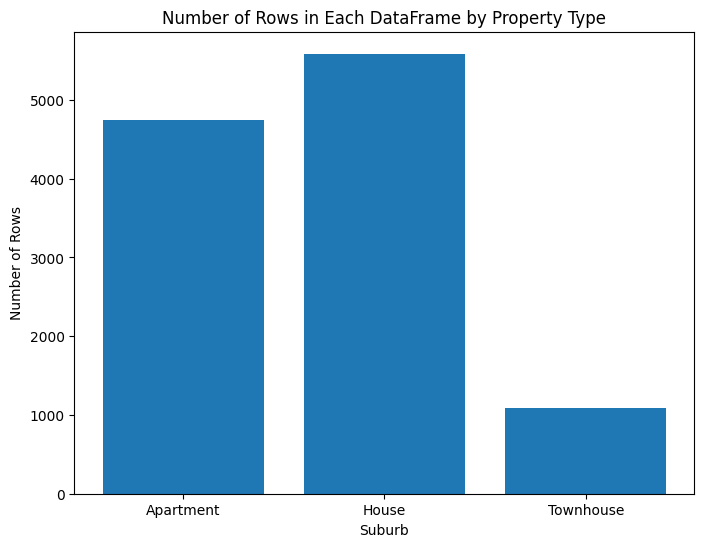

In [22]:
num_rows = [apartment.shape[0], house.shape[0], town_house.shape[0]]

# Property types
property_types = ['Apartment', 'House', 'Townhouse']

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(property_types, num_rows)
plt.xlabel('Property Type')
plt.ylabel('Number of Rows')
plt.title('Number of Rows in Each DataFrame by Property Type')
plt.show()

In [21]:
num_rows

[4741, 5586, 1083]